In [15]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import json
import os

import warnings
warnings.filterwarnings('ignore')

In [43]:
connect = sqlite3.connect('airlines_db.sqlite')
cursor = connect.cursor()

try:
    cursor = connect.cursor()
    print("Connected to the SQLite database.")
except sqlite3.Error as e:
    print(f"Error connecting to the database: {e}")

Connected to the SQLite database.


In [44]:
dtables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", connect)
dtables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


In [45]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connect)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [46]:
airports_data = pd.read_sql_query("""SELECT * FROM airports_data""", connect)

airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [47]:
boarding_passes =  pd.read_sql_query("""SELECT * FROM boarding_passes""",connect)

boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [48]:
bookings  =  pd.read_sql_query("""SELECT * FROM bookings""", connect)

bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [49]:
flights =  pd.read_sql_query("""SELECT * FROM flights""",connect)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [50]:
seats  =  pd.read_sql_query("""SELECT * FROM seats""",connect)

seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [51]:
ticket_flights  =  pd.read_sql_query("""SELECT * FROM ticket_flights""",connect)

ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [52]:
tickets  =  pd.read_sql_query("""SELECT * FROM tickets""",connect)

tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


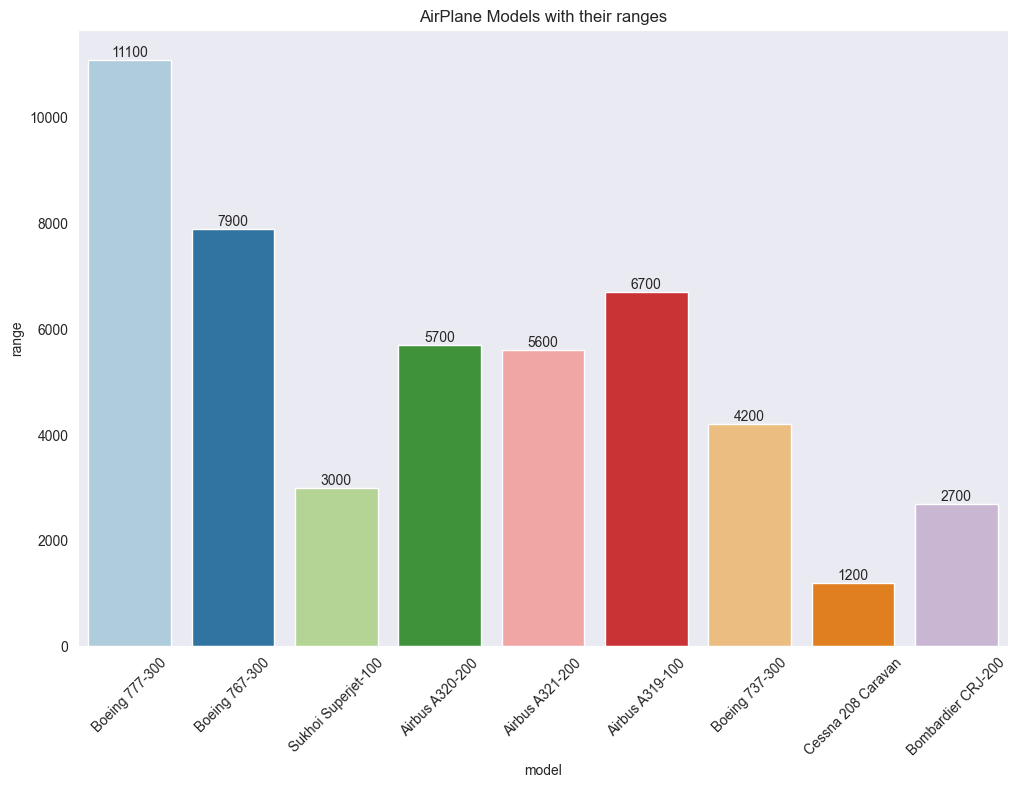

In [53]:
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

sns.set_style('dark')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=aircrafts_data['model'],y='range', data=aircrafts_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()

In [54]:
df1  =  pd.read_sql_query("""SELECT s.aircraft_code, JSON_EXTRACT(model, '$.en') AS model, COUNT(*) AS num_seats 
                             FROM seats AS s
                             JOIN aircrafts_data AS a
                             ON s.aircraft_code = a.aircraft_code
                             GROUP BY s.aircraft_code
                             HAVING num_seats > 100
                             ORDER BY num_seats DESC""", connect)

df1

,aircraft_code,model,num_seats
0,773,Boeing 777-300,402
1,763,Boeing 767-300,222
2,321,Airbus A321-200,170
3,320,Airbus A320-200,140
4,733,Boeing 737-300,130
5,319,Airbus A319-100,116


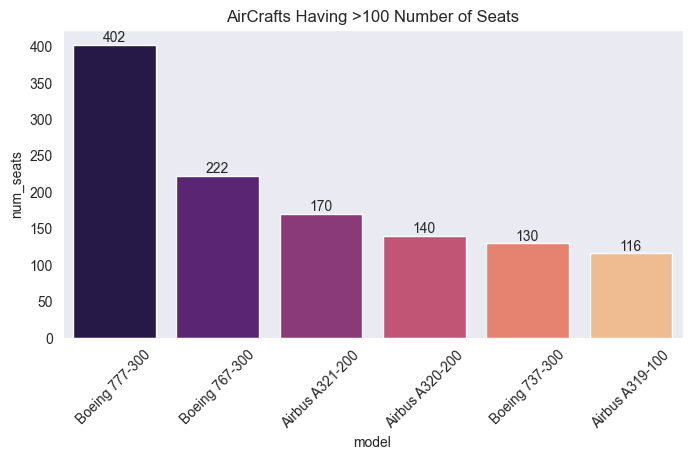

In [28]:
sns.set_style('dark')
plt.figure(figsize = (8,4))
ax  =  sns.barplot(x = 'model', y = 'num_seats', data = df1, palette = 'magma')

for container in ax.containers:
    ax.bar_label(container)

plt.title('AirCrafts Having >100 Number of Seats')
plt.xticks(rotation = 45)
plt.show()

In [55]:
tickets = pd.read_sql_query("""select ticket_no, SUBSTR(book_date,1,10) AS date, total_amount from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref
                    group by date
                    order by date""", connect)

tickets.head(30)

,ticket_no,date,total_amount
0,0005432628587,2017-06-21,52000
1,0005432984533,2017-06-22,123000
2,0005432150056,2017-06-23,64700
3,0005432056234,2017-06-24,13000
4,0005432034471,2017-06-25,6000
5,0005432045579,2017-06-26,14900
6,0005432002041,2017-06-27,17600
7,0005432003645,2017-06-28,99800
8,0005432000989,2017-06-29,24700
9,0005432000999,2017-06-30,6200


In [30]:
tickets1 = pd.read_sql_query("""select SUBSTR(book_date,1,10) AS date, COUNT(ticket_no) AS tickets, total_amount AS ticket_amount, sum(total_amount) AS amount_sum from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref
                    group by date
                    order by date""", conn)
# tickets1 = tickets1.set_index('date', drop=True)

tickets1

,date,tickets,ticket_amount,amount_sum
0,2017-06-21,6,52000,916100
1,2017-06-22,12,123000,1536300
2,2017-06-23,28,64700,3114800
3,2017-06-24,106,13000,10279900
4,2017-06-25,266,6000,24652200
5,2017-06-26,499,14900,48710400
6,2017-06-27,1028,17600,88733500
7,2017-06-28,1678,99800,147624200
8,2017-06-29,2765,24700,248677900
9,2017-06-30,3772,6200,337783200


In [31]:
tickets1['date'] = pd.to_datetime(tickets1['date'])

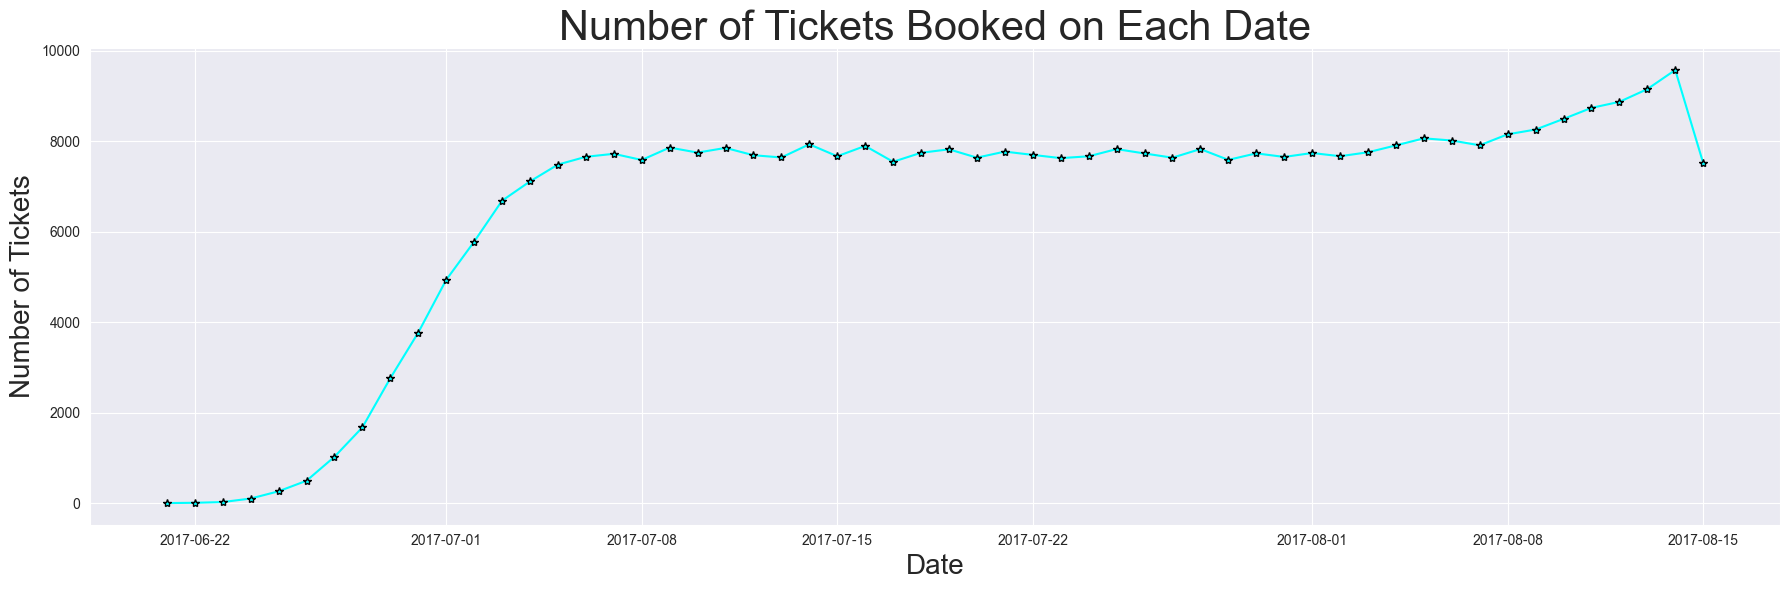

In [56]:
plt.figure(figsize=(18, 6))

plt.plot(tickets1.date, tickets1.tickets, label='Tickets', color='cyan', scalex=True, marker='*', markeredgecolor = 'black')

plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('dark')
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()

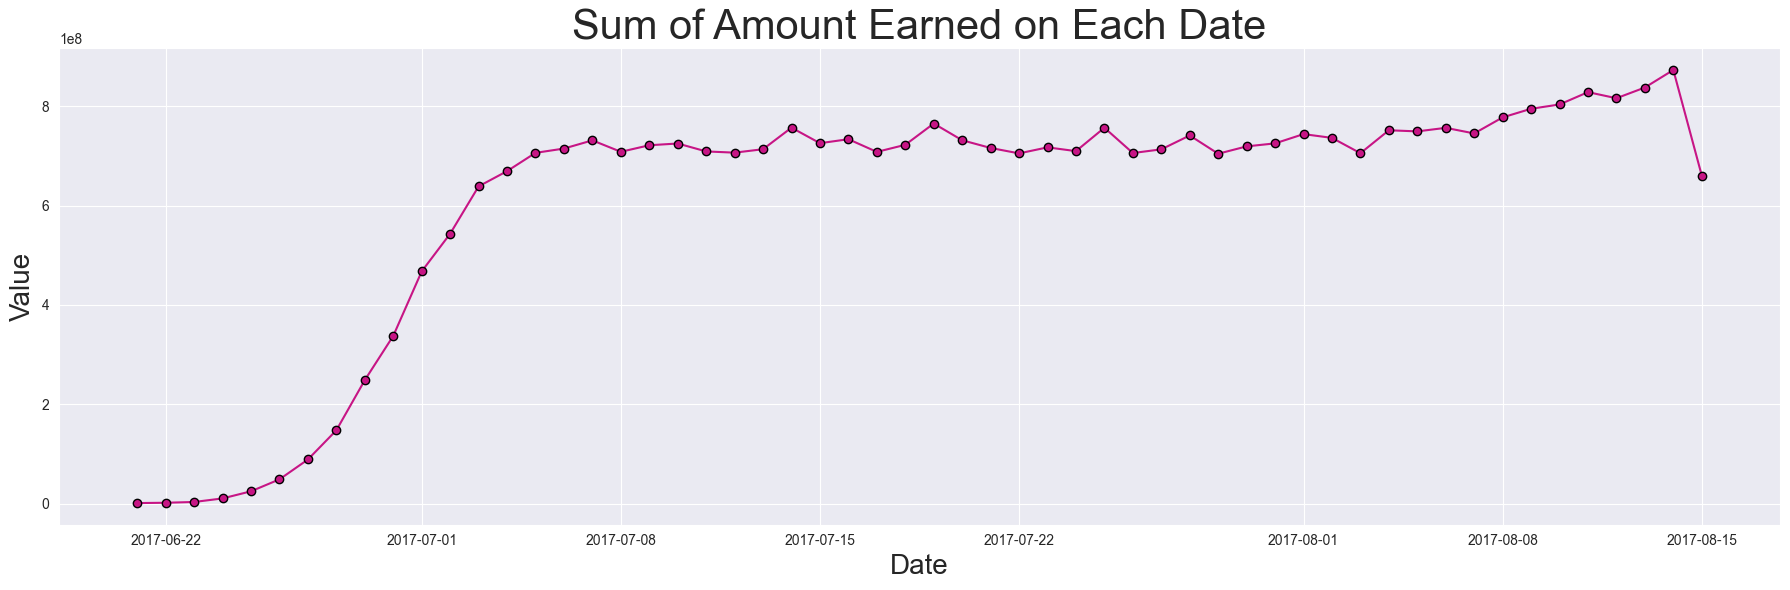

In [57]:
plt.figure(figsize=(18, 6))

# Plot the 'amount_sum' line
plt.plot(tickets1.date, tickets1.amount_sum, label='Amount Sum', color='mediumvioletred', marker='o', markeredgecolor='black')

plt.title('Sum of Amount Earned on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.grid('dark')
plt.tight_layout()

plt.show()

In [58]:
df2 = pd.read_sql_query("""SELECT a.aircraft_code, JSON_EXTRACT(model, '$.en') AS model,
                            tf.fare_conditions AS class, avg(tf.amount) AS avg_amount
                            FROM aircrafts_data AS a
                            JOIN flights AS f
                            ON a.aircraft_code = f.aircraft_code
                            JOIN ticket_flights AS tf
                            ON f.flight_id = tf.flight_id
                            GROUP BY model, class
                            ORDER BY avg_amount DESC""", connect)

df2

,aircraft_code,model,class,avg_amount
0,319,Airbus A319-100,Business,113550.6
1,763,Boeing 767-300,Business,82839.8
2,773,Boeing 777-300,Business,57779.9
3,733,Boeing 737-300,Business,41865.6
4,319,Airbus A319-100,Economy,38311.4
5,321,Airbus A321-200,Business,34435.7
6,SU9,Sukhoi Superjet-100,Business,33487.8
7,773,Boeing 777-300,Comfort,32740.6
8,763,Boeing 767-300,Economy,27594.7
9,773,Boeing 777-300,Economy,19265.2


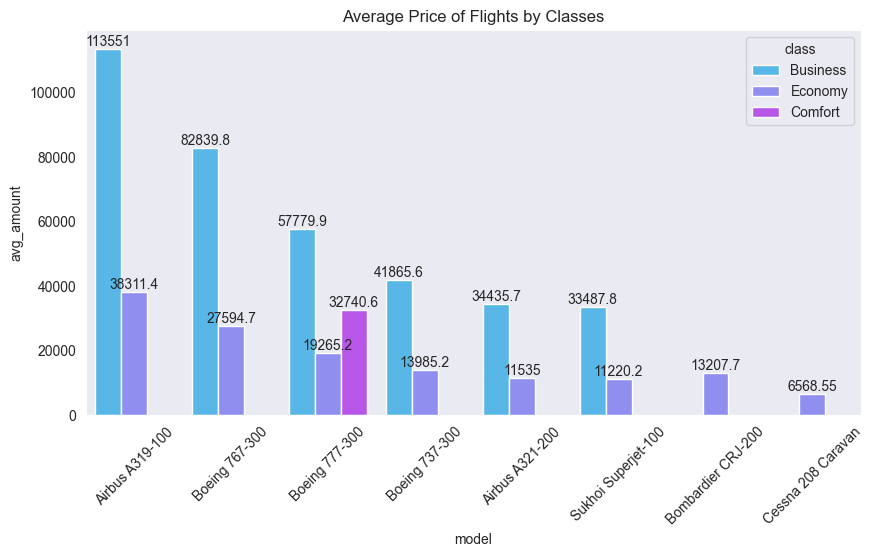

In [59]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
ax  =  sns.barplot(x = 'model', y = 'avg_amount', hue = 'class', data = df2, palette = 'cool')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Price of Flights by Classes')
plt.xticks(rotation = 45)
plt.show()

In [60]:
revenue  =  pd.read_sql_query("""SELECT aircraft_code, model, ticket_count, total_revenue, total_revenue/ticket_count AS avg_revenue_per_ticket FROM
                                 (SELECT a.aircraft_code, JSON_EXTRACT(model, '$.en') AS model,
                                 COUNT(*) AS ticket_count, SUM(tf.amount) AS total_revenue FROM aircrafts_data AS a
                                 JOIN flights AS f
                                 ON a.aircraft_code = f.aircraft_code
                                 JOIN ticket_flights AS tf
                                 ON f.flight_id = tf.flight_id
                                 GROUP BY a.aircraft_code)""", connect)
revenue

,aircraft_code,model,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,Airbus A319-100,52853,2706163100,51201
1,321,Airbus A321-200,107129,1638164100,15291
2,733,Boeing 737-300,86102,1426552100,16568
3,763,Boeing 767-300,124774,4371277100,35033
4,773,Boeing 777-300,144376,3431205500,23765
5,CN1,Cessna 208 Caravan,14672,96373800,6568
6,CR2,Bombardier CRJ-200,150122,1982760500,13207
7,SU9,Sukhoi Superjet-100,365698,5114484700,13985


In [63]:
# Define the SQL query to create the view

# Drop the existing table 'bh' if it exists
drop_table_query = "DROP VIEW IF EXISTS flight_booked_seats;"
cursor.execute(drop_table_query)

# Create the view 'bbh'
create_view_query = """
CREATE VIEW flight_booked_seats AS
SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
FROM boarding_passes
INNER JOIN flights 
ON boarding_passes.flight_id=flights.flight_id
GROUP BY aircraft_code, flights.flight_id;
"""
cursor.execute(create_view_query)

# Commit the changes to the database
connect.commit()

# Now you can read the view data using a SELECT query
f_b_s = pd.read_sql_query("SELECT * FROM flight_booked_seats", connect)

f_b_s

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [64]:
# Define the SQL query to create the view

# Drop the existing table 'num_seats' if it exists
drop_table_query = "DROP VIEW IF EXISTS num_seats;"
cursor.execute(drop_table_query)

# Create the view 'num_seats'
create_view_query = """
CREATE VIEW num_seats AS
SELECT s.aircraft_code, JSON_EXTRACT(model, '$.en') AS model, COUNT(*) AS num_seats 
                             FROM seats AS s
                             JOIN aircrafts_data AS a
                             ON s.aircraft_code = a.aircraft_code
                             GROUP BY s.aircraft_code
                             
                             ORDER BY num_seats DESC;
"""
cursor.execute(create_view_query)

# Commit the changes to the database
connect.commit()

# Now you can read the view data using a SELECT query
num_seats = pd.read_sql_query("SELECT * FROM num_seats", connect)

num_seats

,aircraft_code,model,num_seats
0,773,Boeing 777-300,402
1,763,Boeing 767-300,222
2,321,Airbus A321-200,170
3,320,Airbus A320-200,140
4,733,Boeing 737-300,130
5,319,Airbus A319-100,116
6,SU9,Sukhoi Superjet-100,97
7,CR2,Bombardier CRJ-200,50
8,CN1,Cessna 208 Caravan,12


In [65]:

occupancy_rate  =  pd.read_sql_query("""SELECT a.aircraft_code, model, b.num_seats, ROUND(AVG(a.seats_count)) AS booked_seats, AVG(a.seats_count)/b.num_seats AS occupancy_rate
                                        FROM flight_booked_seats AS a
                                        JOIN num_seats AS b
                                        ON a.aircraft_code = b.aircraft_code
                                        GROUP BY a.aircraft_code
                                        ORDER BY occupancy_rate DESC""", connect)
occupancy_rate

,aircraft_code,model,num_seats,booked_seats,occupancy_rate
0,773,Boeing 777-300,402,265.0,0.7
1,733,Boeing 737-300,130,80.0,0.6
2,SU9,Sukhoi Superjet-100,97,57.0,0.6
3,321,Airbus A321-200,170,89.0,0.5
4,763,Boeing 767-300,222,114.0,0.5
5,CN1,Cessna 208 Caravan,12,6.0,0.5
6,319,Airbus A319-100,116,54.0,0.5
7,CR2,Bombardier CRJ-200,50,21.0,0.4


In [67]:
occupancy_rate['Inc occupancy_rate']  =  occupancy_rate['occupancy_rate']  +  occupancy_rate['occupancy_rate'] * 0.1

occupancy_rate

,aircraft_code,model,num_seats,booked_seats,occupancy_rate,Inc occupancy_rate
0,773,Boeing 777-300,402,265.0,0.7,0.7
1,733,Boeing 737-300,130,80.0,0.6,0.7
2,SU9,Sukhoi Superjet-100,97,57.0,0.6,0.6
3,321,Airbus A321-200,170,89.0,0.5,0.6
4,763,Boeing 767-300,222,114.0,0.5,0.6
5,CN1,Cessna 208 Caravan,12,6.0,0.5,0.6
6,319,Airbus A319-100,116,54.0,0.5,0.5
7,CR2,Bombardier CRJ-200,50,21.0,0.4,0.5


In [68]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", connect)

total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [69]:
# Set the float formatting options
pd.options.display.float_format = '{:.1f}'.format


occupancy_rate['Inc Total Annual Turnover']  =  (total_revenue['total_revenue']/occupancy_rate['occupancy_rate']) * occupancy_rate['Inc occupancy_rate']

occupancy_rate

,aircraft_code,model,num_seats,booked_seats,occupancy_rate,Inc occupancy_rate,Inc Total Annual Turnover
0,773,Boeing 777-300,402,265.0,0.7,0.7,2976779410.0
1,733,Boeing 737-300,130,80.0,0.6,0.7,1801980510.0
2,SU9,Sukhoi Superjet-100,97,57.0,0.6,0.6,1569207310.0
3,321,Airbus A321-200,170,89.0,0.5,0.6,4808404810.0
4,763,Boeing 767-300,222,114.0,0.5,0.6,3774326050.0
5,CN1,Cessna 208 Caravan,12,6.0,0.5,0.6,106011180.0
6,319,Airbus A319-100,116,54.0,0.5,0.5,2181036550.0
7,CR2,Bombardier CRJ-200,50,21.0,0.4,0.5,5625933170.0
